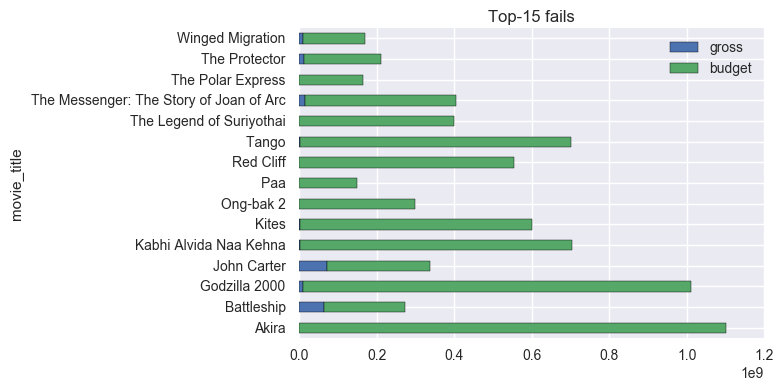

In [19]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

df = pd.read_csv('movie_metadata.csv')
df = df.drop(df[df.budget > 2000000000].index) #drop the rows where budget greater than 2,000,000,000

df['profit'] = df.gross - df.budget
top_15_fails = df.sort(columns='profit').head(15)
top_15_success = df.sort(columns='profit', ascending=False).head(15)
top_15_fails[['gross', 'budget']].groupby(df['movie_title']).sum().plot.barh(stacked=True, title='Top-15 fails')

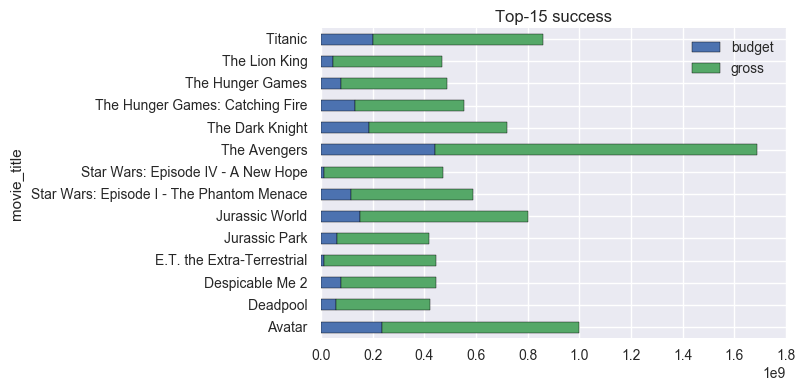

In [20]:
top_15_success[['budget', 'gross']].groupby(df['movie_title']).sum().plot.barh(stacked=True, title='Top-15 success')

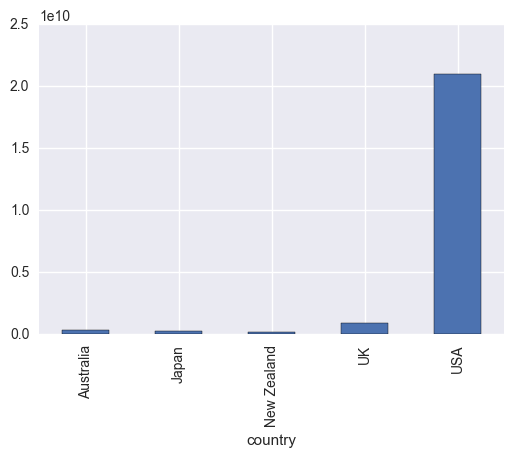

In [21]:
#successrate sorted by country
success_country = df.sort(columns='profit', ascending=False).head(100).groupby(df['country']).sum()
success_country['profit'].plot.bar()

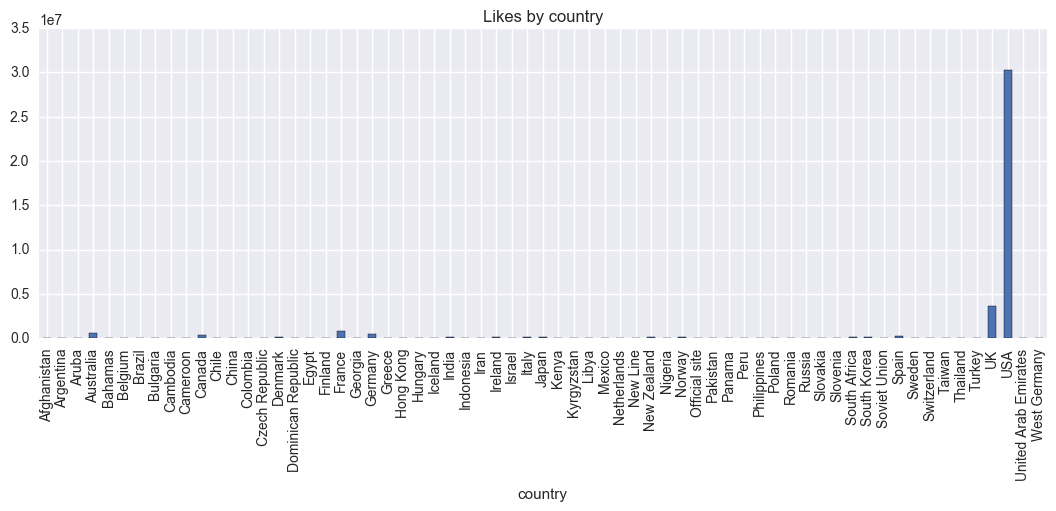

In [22]:
#facebook_likes sorted and grouped by country
x = df.movie_facebook_likes.groupby(df.country).sum().plot.bar(figsize=(13, 4), title='Likes by country')

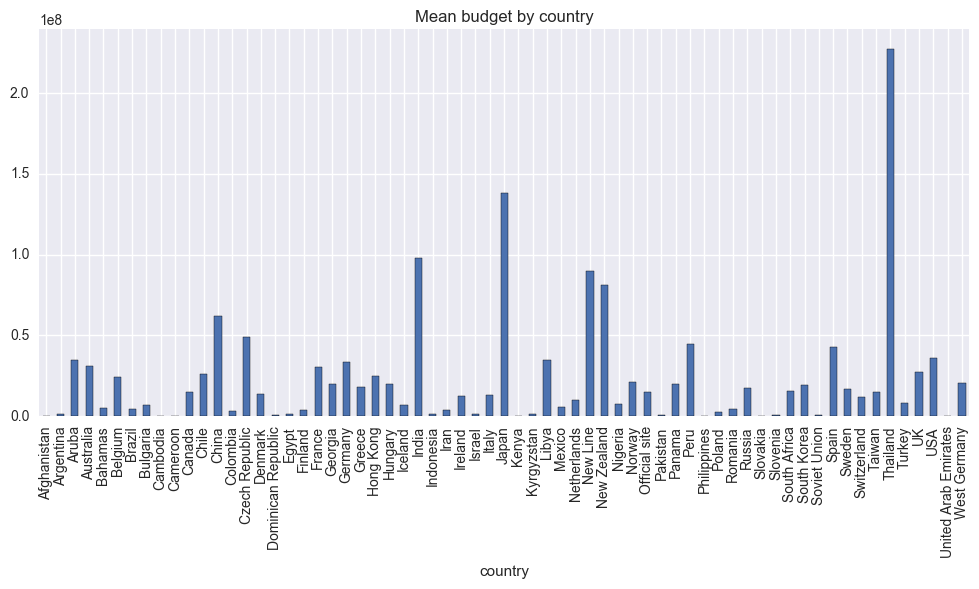

In [23]:
#most budget used, sorted by country
df.budget.groupby(df.country).mean().plot.bar(figsize = (12, 5), ylim=(0, 240000000), title='Mean budget by country')

0.351387167162


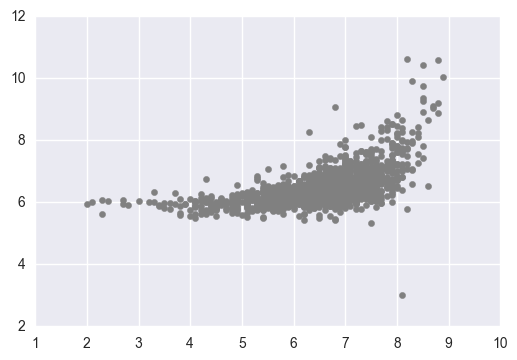

In [25]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

df.dropna(inplace=True)

X = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 
        'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
        'movie_facebook_likes']]

y = df[['imdb_score']]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
predicted = lr.predict(X_test)
plt.scatter(y_test, predicted, color='gray')

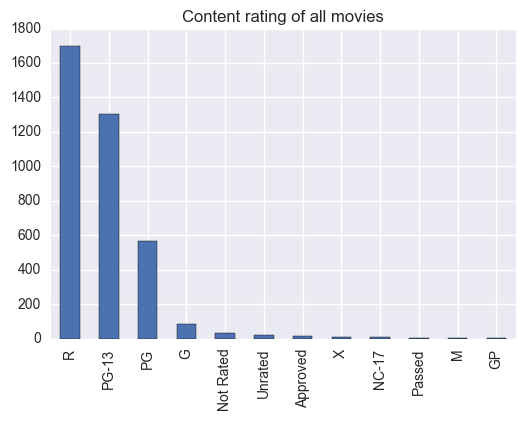

In [28]:
#Find the content rating of all movies
imdb_rating = df['content_rating'].value_counts()
imdb_rating.plot(kind='bar', title = "Content rating of all movies")

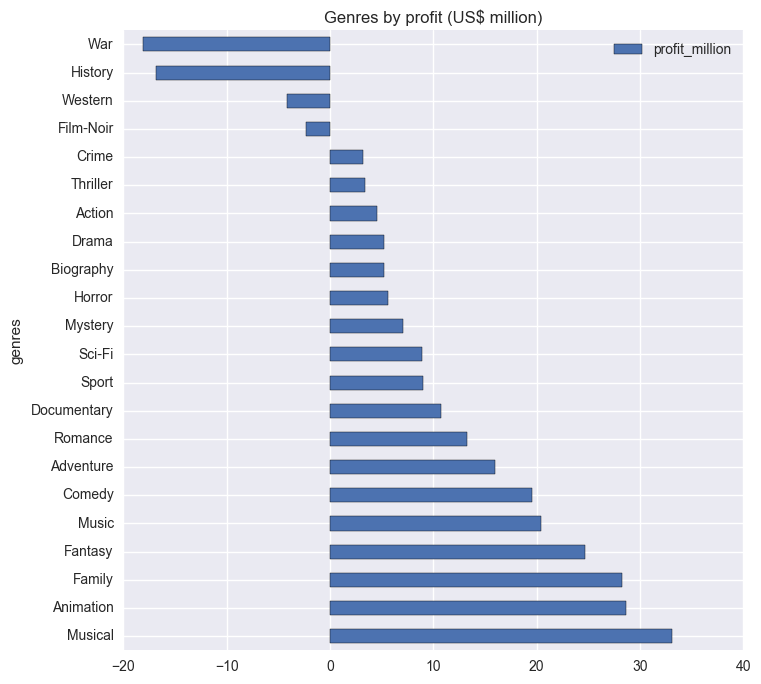

In [34]:
from pandas import Series, DataFrame

dt = df[['genres','movie_title','language','title_year','imdb_score','duration','profit']]
dt.head()

s = dt['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del dt['genres']
df = dt.join(s)

df['genres'].unique()
df3 = df[['movie_title', 'profit','genres']]

df4 = df3.groupby(['genres']).mean()

df4['profit_million'] = df4['profit']/1000000
del df4['profit']

df4.sort_values('profit_million', ascending=False, inplace = True )

df4[['profit_million']].plot.barh(stacked=True, title = 'Genres by profit (US$ million)', figsize=(8, 8));

In [ ]:
from os import path
from wordcloud import WordCloud

d = path.dirname(__file__)

# Read the whole text.
text = open(path.join(d, 'wordcloud.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()